# Kaggle 房价预测

导入库

In [435]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import sklearn.metrics as sm

读取训练集和测试集


In [436]:
# Define the file path
file_path = 'dataset/house-prices/train.csv'

# Read the CSV file into a DataFrame
df_train = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [437]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [438]:
df_train.shape

(1460, 81)

数据预处理

In [439]:
# 查缺失数据在每列中的比例

missing_values = df_train.isnull().sum()

missing_values = missing_values[missing_values > 0]

missing_percentage = (missing_values / len(df_train)) * 100

print(missing_percentage)

LotFrontage     17.739726
Alley           93.767123
MasVnrType      59.726027
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64


In [440]:
# 删除丢失数据太多的列

columns_to_drop = missing_percentage[missing_percentage > 30].index

df_train.drop(columns=columns_to_drop, inplace=True)

In [441]:
columns_to_fill = missing_percentage[missing_percentage < 30].index
columns_to_fill

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')

In [442]:
# 平均值填充数据

for column in columns_to_fill:
    if df_train[column].dtype == "float64" or df_train[column].dtype == "int64":
        df_train[column].fillna(df_train[column].mean(), inplace=True)
    else:
        df_train[column].fillna(df_train[column].mode()[0], inplace=True)

df_train.head()

/tmp/ipykernel_16050/1601182628.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[column].fillna(df_train[column].mean(), inplace=True)
/tmp/ipykernel_16050/1601182628.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [443]:
df_train.isnull().sum().sum()

0

In [444]:
df_train.Id.nunique()

1460

删除相关性低的特征

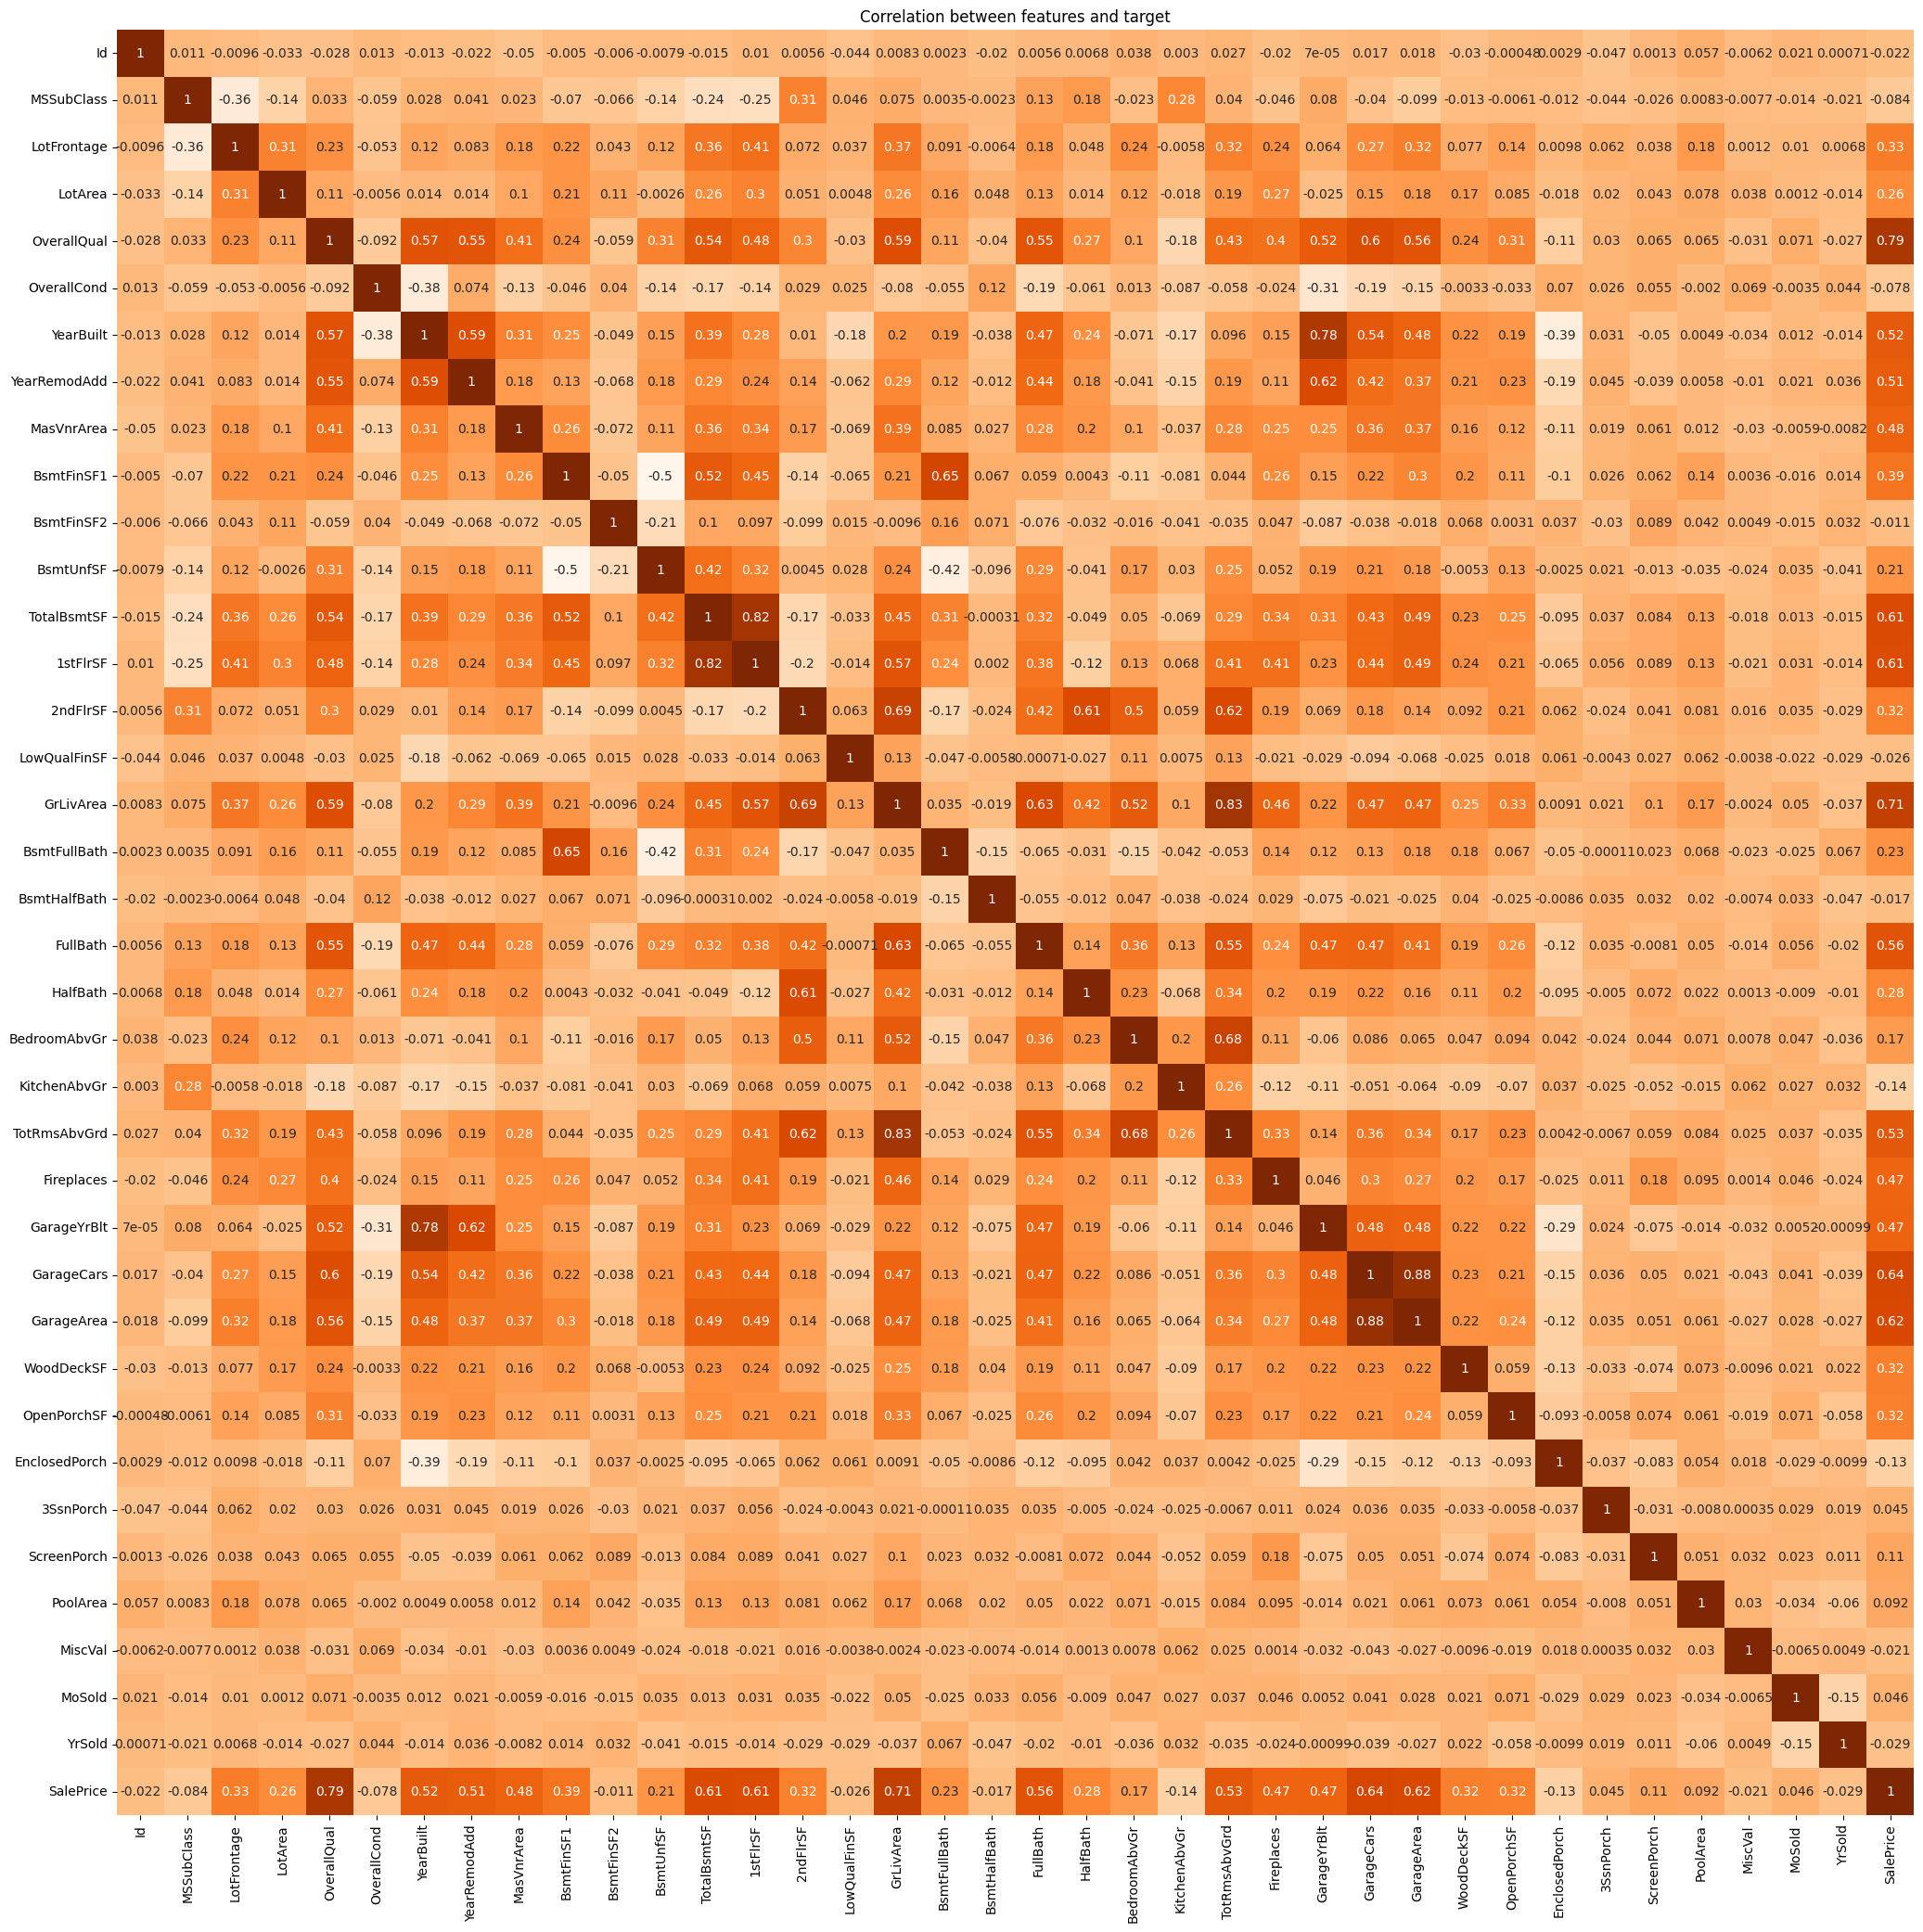

In [445]:
corr = df_train.select_dtypes(exclude=['object']).corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features and target')
plt.show()

In [446]:
# 删除相关度较低的
low_corr_features = corr["SalePrice"][corr["SalePrice"] < 0].index
df_dropped_low = df_train.drop(low_corr_features, axis=1)

In [447]:
# 删除相关度太高的
high_corr_features = corr["SalePrice"][corr["SalePrice"] > 0.6].index
high_corr_features = high_corr_features.drop("SalePrice")
print(high_corr_features)
df_dropped_low_high = df_dropped_low.drop(high_corr_features, axis=1)

Index(['OverallQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars',
       'GarageArea'],
      dtype='object')


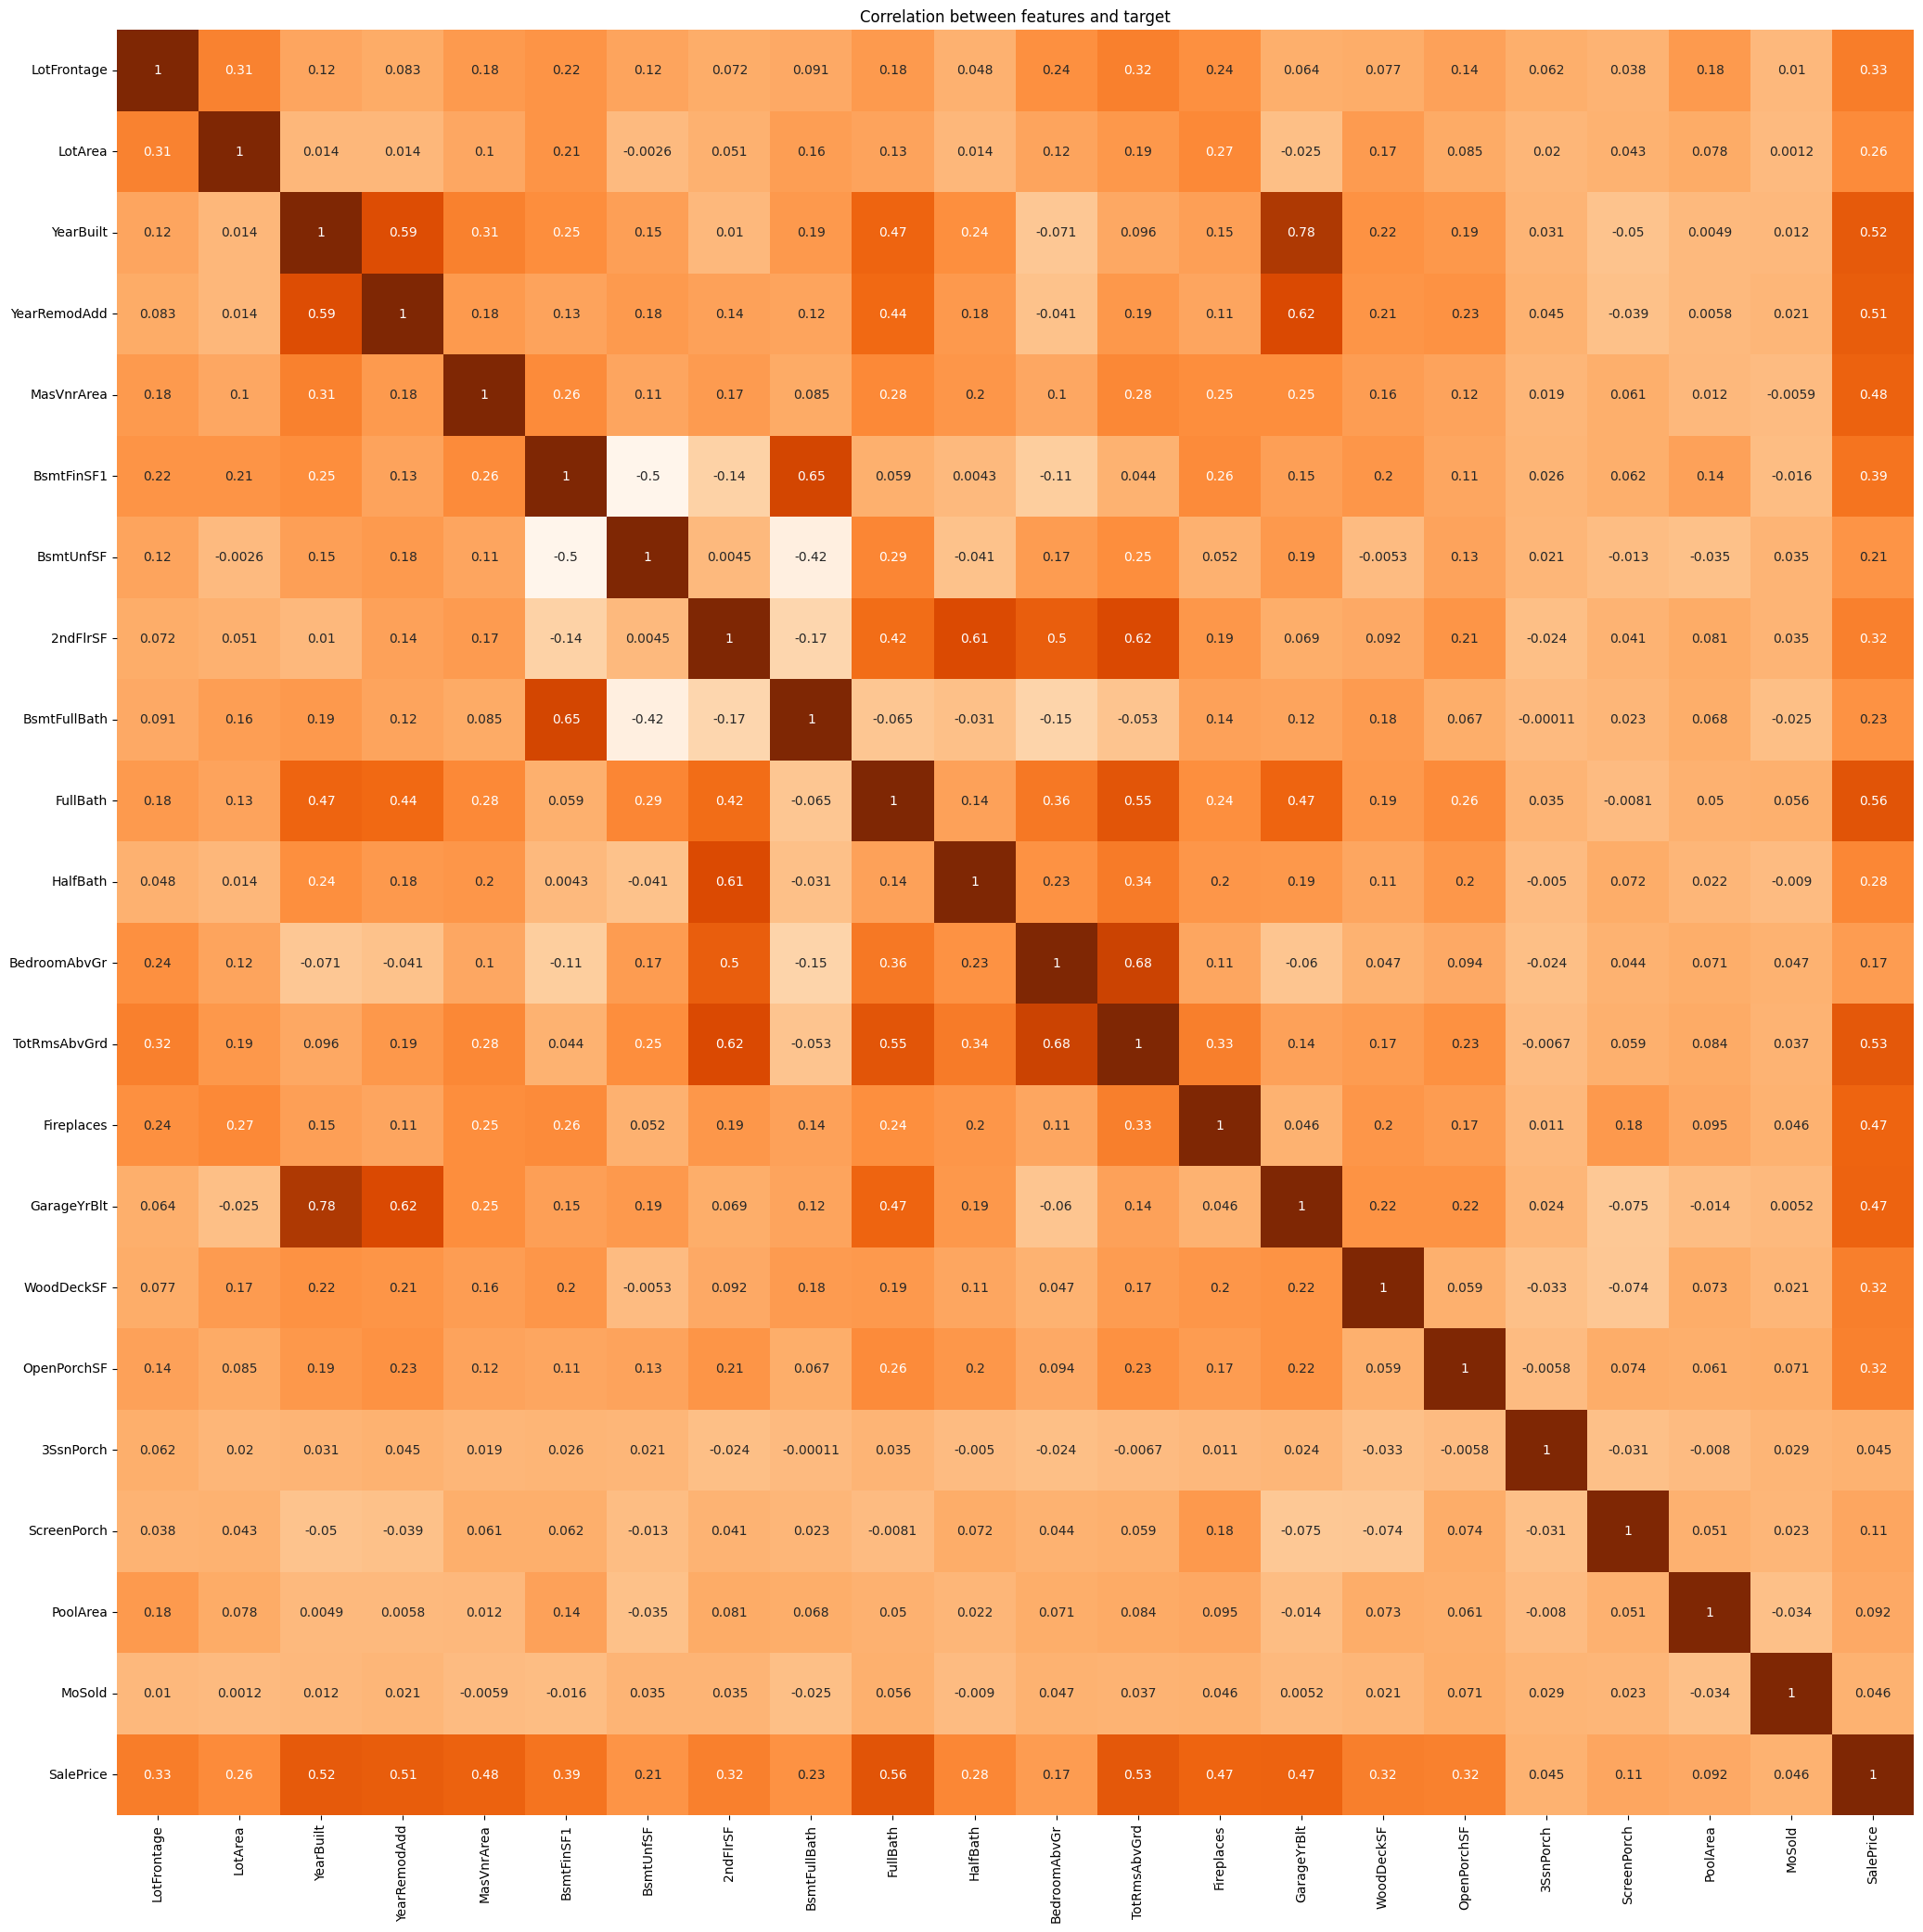

In [448]:
corr = df_dropped_low_high.select_dtypes(exclude=['object']).corr()
plt.subplots(1,1, figsize=(25,25))
sns.heatmap(data=corr, cmap ='Oranges', annot = corr, cbar=None)
plt.title('Correlation between features and target')
plt.show()

独热编码

In [449]:
df_encoded = pd.get_dummies(df_dropped_low_high, columns=list(df_dropped_low_high.select_dtypes(include=['object']).columns))
print("\n'独热编码:")
print(df_encoded)


'独热编码:
      LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       2003          2003       196.0         706   
1            80.0     9600       1976          1976         0.0         978   
2            68.0    11250       2001          2002       162.0         486   
3            60.0     9550       1915          1970         0.0         216   
4            84.0    14260       2000          2000       350.0         655   
...           ...      ...        ...           ...         ...         ...   
1455         62.0     7917       1999          2000         0.0           0   
1456         85.0    13175       1978          1988       119.0         790   
1457         66.0     9042       1941          2006         0.0         275   
1458         68.0     9717       1950          1996         0.0          49   
1459         75.0     9937       1965          1965         0.0         830   

      BsmtUnfSF  2ndFlrSF  BsmtFullBath  Fu

In [450]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 252 entries, LotFrontage to SaleCondition_Partial
dtypes: bool(230), float64(3), int64(19)
memory usage: 579.0 KB


划分数据集

In [451]:
print(df_encoded)
# Separate the features and the target variable
X = df_encoded.drop('SalePrice', axis=1)  # Features (all columns except 'SalePrice')
y = df_encoded['SalePrice']               # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1998)

X_train = X_train.astype("float")
X_test = X_test.astype("float")
y_train = y_train.astype("float")
y_test = y_test.astype("float")

      LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0            65.0     8450       2003          2003       196.0         706   
1            80.0     9600       1976          1976         0.0         978   
2            68.0    11250       2001          2002       162.0         486   
3            60.0     9550       1915          1970         0.0         216   
4            84.0    14260       2000          2000       350.0         655   
...           ...      ...        ...           ...         ...         ...   
1455         62.0     7917       1999          2000         0.0           0   
1456         85.0    13175       1978          1988       119.0         790   
1457         66.0     9042       1941          2006         0.0         275   
1458         68.0     9717       1950          1996         0.0          49   
1459         75.0     9937       1965          1965         0.0         830   

      BsmtUnfSF  2ndFlrSF  BsmtFullBath  FullBath  

转张量

In [452]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float, requires_grad=True)
Y_train_tensor = torch.tensor(y_train.values, dtype=torch.float, requires_grad=True)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float)
Y_test_tensor = torch.tensor(y_test.values, dtype=torch.float)

In [453]:
X_train_tensor.shape

torch.Size([1168, 251])

模型

In [454]:
class Lr(torch.nn.Module):
    def __init__(self):
        super(Lr, self).__init__()
        self.linear = torch.nn.Linear(X_train_tensor.shape[1], 1)
 
    def forward(self, x):
        out = self.linear(x)
        return out

In [455]:
model = Lr() #1. 实例化模型
criterion = torch.nn.MSELoss() #2. 实例化损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=1e-9) #3. 实例化优化器类
for i in range(200):
    y_predict = model(X_train_tensor) #4. 向前计算预测值
    print(y_predict)
    loss = criterion(Y_train_tensor, y_predict) #5. 调用损失函数传入真实值和预测值，得到损失结果
    optimizer.zero_grad() #5. 当前循环参数梯度置为0
    loss.backward() #6. 计算梯度
    optimizer.step()  #7. 更新参数的值

print('w=',model.linear.weight)
print('b=',model.linear.bias)

tensor([[ 69.9240],
        [119.0531],
        [142.1881],
        ...,
        [153.9506],
        [156.2259],
        [149.2275]], grad_fn=<AddmmBackward0>)
tensor([[40127.4883],
        [31747.5508],
        [48915.9805],
        ...,
        [31824.0918],
        [60759.5156],
        [51750.1953]], grad_fn=<AddmmBackward0>)
tensor([[61896.5664],
        [49095.9219],
        [75109.2188],
        ...,
        [49190.1992],
        [93080.4062],
        [79403.1328]], grad_fn=<AddmmBackward0>)
tensor([[ 73993.5938],
        [ 58890.1406],
        [ 89364.4062],
        ...,
        [ 58989.5820],
        [110451.5625],
        [ 94395.7578]], grad_fn=<AddmmBackward0>)
tensor([[ 80972.0703],
        [ 64684.7188],
        [ 97305.7422],
        ...,
        [ 64782.7109],
        [119918.7500],
        [102693.2734]], grad_fn=<AddmmBackward0>)
tensor([[ 85238.5547],
        [ 68358.2031],
        [101905.5703],
        ...,
        [ 68451.2969],
        [125205.5234],
        [107

tensor([[100264.8828],
        [ 83301.3594],
        [114196.0469],
        ...,
        [ 83315.6797],
        [136149.1406],
        [119324.1641]], grad_fn=<AddmmBackward0>)
tensor([[101356.2500],
        [ 84453.9531],
        [114958.1328],
        ...,
        [ 84460.4844],
        [136687.3906],
        [120023.9141]], grad_fn=<AddmmBackward0>)
tensor([[102433.1953],
        [ 85591.7266],
        [115709.4766],
        ...,
        [ 85590.5312],
        [137217.2969],
        [120713.6328]], grad_fn=<AddmmBackward0>)
tensor([[103496.5312],
        [ 86715.3125],
        [116451.0078],
        ...,
        [ 86706.4688],
        [137739.7969],
        [121394.1953]], grad_fn=<AddmmBackward0>)
tensor([[104546.6641],
        [ 87825.1172],
        [117183.1797],
        ...,
        [ 87808.7266],
        [138255.4531],
        [122066.0938]], grad_fn=<AddmmBackward0>)
tensor([[105583.9453],
        [ 88921.4219],
        [117906.3203],
        ...,
        [ 88897.5703],
     

/home/song/.conda/envs/d2l/lib/python3.12/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1168, 1])) that is different to the input size (torch.Size([1168])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


tensor([[110584.9766],
        [ 94207.8594],
        [121392.7891],
        ...,
        [ 94147.9453],
        [141219.1875],
        [125928.6328]], grad_fn=<AddmmBackward0>)
tensor([[111549.2188],
        [ 95227.3047],
        [122065.1094],
        ...,
        [ 95160.3984],
        [141692.5000],
        [126545.4766]], grad_fn=<AddmmBackward0>)
tensor([[112501.8594],
        [ 96234.5000],
        [122729.3516],
        ...,
        [ 96160.6953],
        [142160.1094],
        [127154.8672]], grad_fn=<AddmmBackward0>)
tensor([[113442.9922],
        [ 97229.5625],
        [123385.5938],
        ...,
        [ 97148.9609],
        [142622.1250],
        [127756.9375]], grad_fn=<AddmmBackward0>)
tensor([[114372.7891],
        [ 98212.6719],
        [124033.9453],
        ...,
        [ 98125.3281],
        [143078.5781],
        [128351.7656]], grad_fn=<AddmmBackward0>)
tensor([[115291.3438],
        [ 99183.9766],
        [124674.5000],
        ...,
        [ 99089.9688],
     

测试

In [456]:
y_predict = model(X_test_tensor)

print(f"{model}")
print(f"RMSE is {np.sqrt(sm.mean_squared_error(Y_test_tensor.detach().numpy(), y_predict.detach().numpy()))}")
print(f"MAE is {sm.mean_absolute_error(Y_test_tensor.detach().numpy(), y_predict.detach().numpy())}")
print(f"MSE is {sm.mean_squared_error(Y_test_tensor.detach().numpy(), y_predict.detach().numpy())}")
print(f"R2 is {sm.r2_score(Y_test_tensor.detach().numpy(), y_predict.detach().numpy())}")

Lr(
  (linear): Linear(in_features=251, out_features=1, bias=True)
)
RMSE is 80176.1953125
MAE is 52225.72265625
MSE is 6428222464.0
R2 is 0.10044627207866885
